In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [11]:
cat = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_boot']

In [15]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

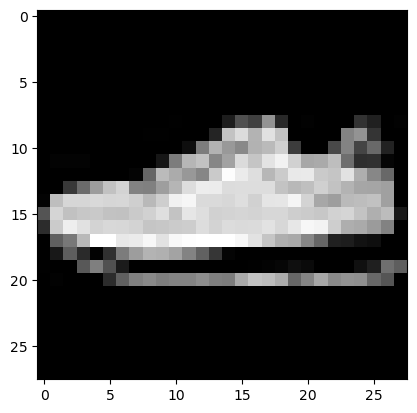

In [21]:
plt.imshow(x_train[425], cmap = 'gray');

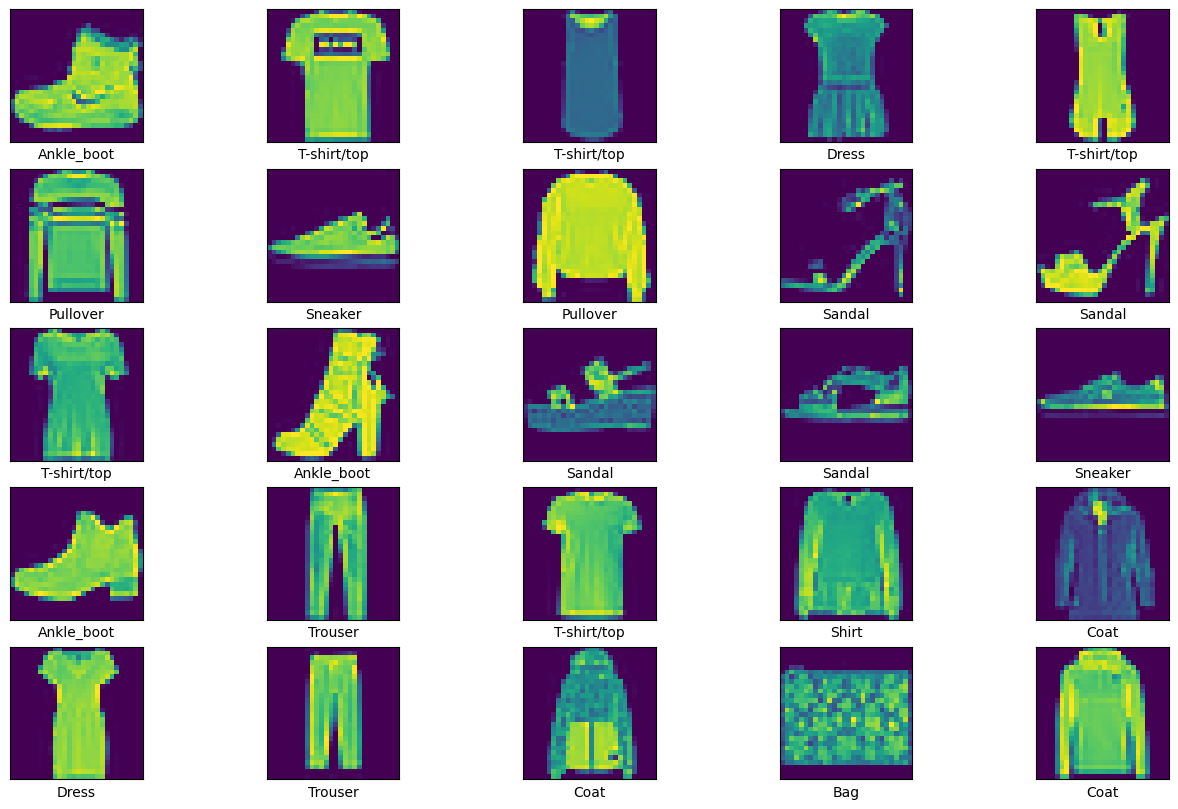

In [29]:
plt.figure(figsize=(16,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(cat[y_train[i]])

In [33]:
x_train[1];

In [35]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [39]:
x_train[1].shape

(28, 28)

In [41]:
# add a colour channel
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

In [43]:
x_train[1].shape

(28, 28, 1)

In [45]:
# ohe

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### define the model architecture

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [51]:
model = Sequential([
    Conv2D(32, (3,3), activation= 'relu', input_shape=(28, 28, 1)),
    MaxPool2D((2,2)),

    Conv2D(64, (3,3), activation= 'relu'),
    MaxPool2D((2,2)),

    Conv2D(64, (3,3), activation= 'relu'),

    Flatten(),

    Dense(64, activation= 'relu'),
    Dense(10, activation= 'softmax')
])

/home/aditya/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'],
             optimizer = 'adam')

In [57]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 10, 
                  validation_split= 0.2)

Epoch 1/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.7649 - loss: 0.6415 - val_accuracy: 0.8679 - val_loss: 0.3650
Epoch 2/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.8808 - loss: 0.3236 - val_accuracy: 0.8881 - val_loss: 0.3060
Epoch 3/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.9025 - loss: 0.2653 - val_accuracy: 0.8885 - val_loss: 0.2950
Epoch 4/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.9133 - loss: 0.2381 - val_accuracy: 0.9069 - val_loss: 0.2593
Epoch 5/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.9221 - loss: 0.2070 - val_accuracy: 0.8968 - val_loss: 0.2842
Epoch 6/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.9262 - loss: 0.1916 - val_accuracy: 0.9068 - val_loss: 0.2534
Epoch 7/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.9361 - loss: 0.1666 - val_accuracy: 0.8980 - val_loss: 0.3074
Epoch 8/10
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.9403 - loss: 0

In [59]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8987 - loss: 0.3878
